In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

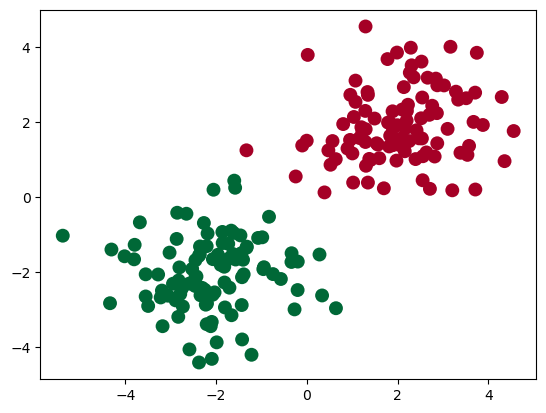

In [2]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
# first 100 points as 0 and last 100 points as 1
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [4]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

# Loss and optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss() # the target lable is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [5]:
plt.ion()

/tmp/ipykernel_176243/2422706106.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


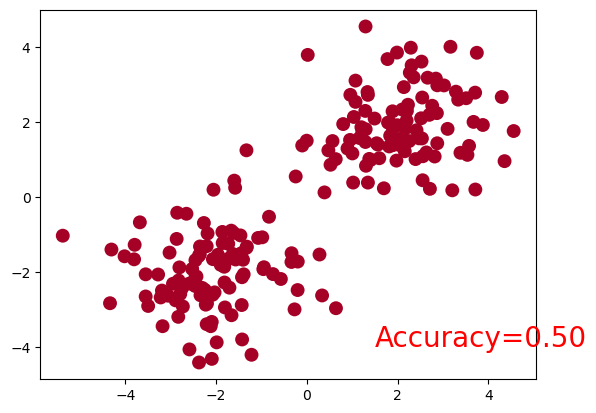

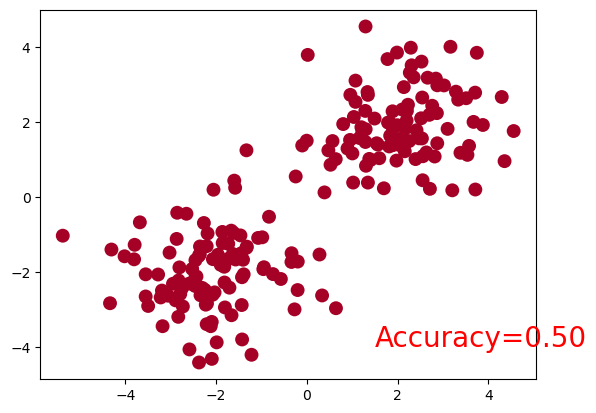

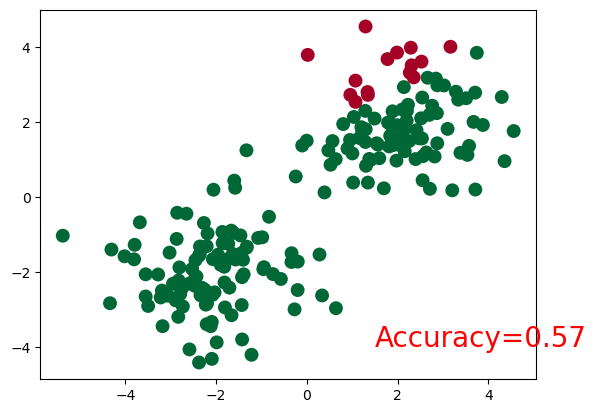

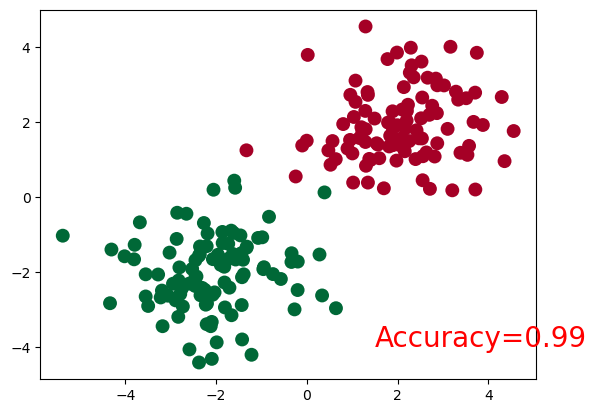

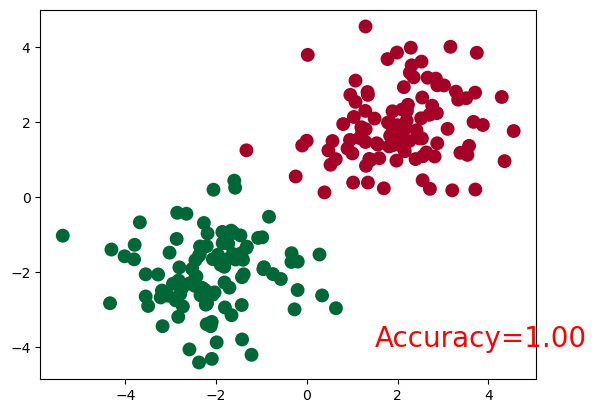

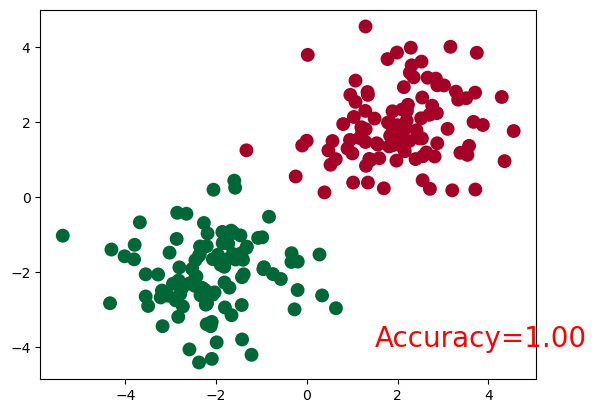

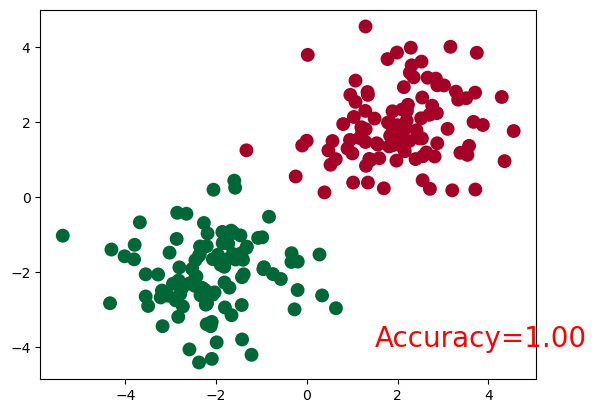

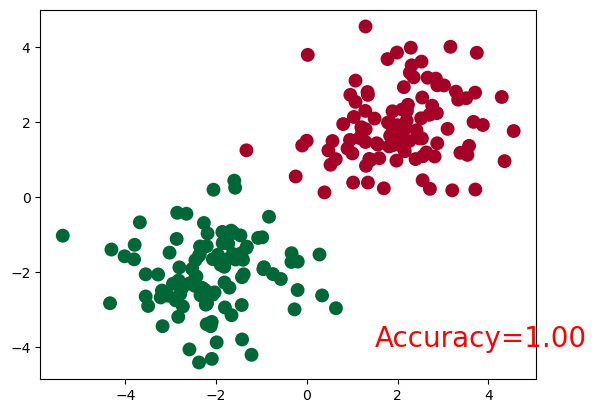

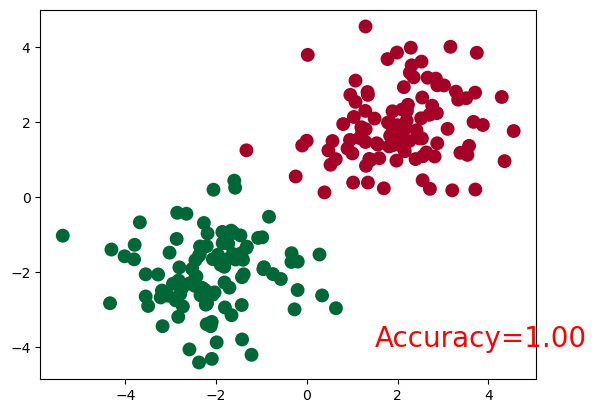

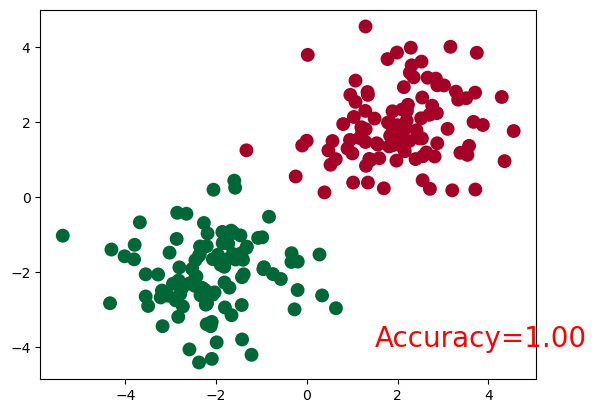

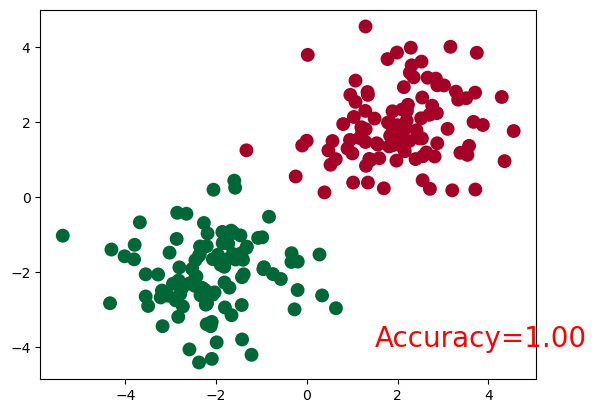

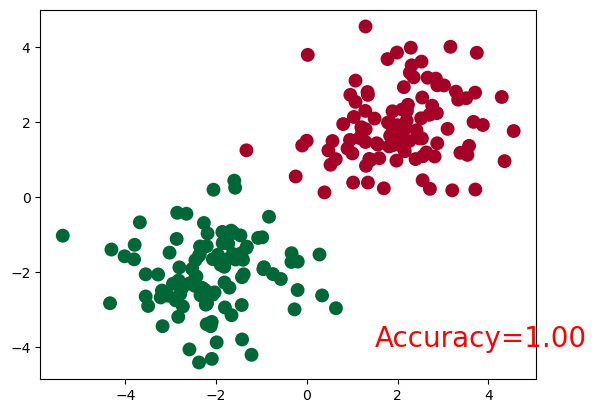

In [6]:
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%10==0 or t in [3, 6]:
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

In [20]:
test = torch.FloatTensor([[-2,-2],[2,2],[0,0],[0,0.5],[0,-0.5]])
out = net(test)
_, prediction = torch.max(F.softmax(out, dim=0), dim=1)
pred_y = prediction.data.numpy().squeeze()
print(pred_y)

[1 0 1 0 1]
